In [5]:
# Import all necessary libraries.
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
import numpy as np

In [6]:
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [7]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [8]:
# Convert a collection of text documents to a matrix of token counts.
cv = CountVectorizer()
# Naive Bayes classifier for multinomial models.
mnb = MultinomialNB()
# Create a pipeline that attaches the vectorizer to a multinomial naive Bayes classifier.
model = make_pipeline(cv, mnb)

In [9]:
# Train model. Apply the model to the training data.
model.fit(train.data, train.target)
# Run validation. Predict labels for the test data.
labels = model.predict(test.data)

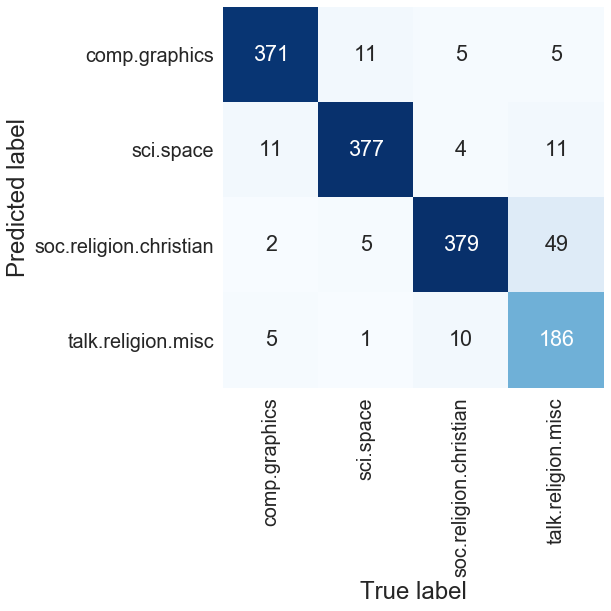

In [10]:
# Evaluate the model's performance with the confusion matrix between the true and predicted labels for the test data.
fig = plt.figure(figsize=(7,7))
mat = confusion_matrix(test.target, labels)
sns.set(font_scale=1.8)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names, cmap="Blues")
plt.xlabel('True label', fontsize=24)
plt.ylabel('Predicted label', fontsize=24)
# Save figure
#plt.savefig("confusion_matrix_text_classification.png", dpi=600)
plt.show()

In [11]:
print(classification_report(test.target, labels, target_names=categories))

                        precision    recall  f1-score   support

    talk.religion.misc       0.95      0.95      0.95       389
soc.religion.christian       0.94      0.96      0.95       394
             sci.space       0.87      0.95      0.91       398
         comp.graphics       0.92      0.74      0.82       251

              accuracy                           0.92      1432
             macro avg       0.92      0.90      0.91      1432
          weighted avg       0.92      0.92      0.92      1432

